# Last FM - Assignment 2
### Written by: Christian Sprauge

##### Decription:

##### Data:

##### General Findings:

###### Load in Libraries

In [1]:
library("tidyverse")
library("ggthemes")
options(repr.matrix.max.cols=25,
        repr.matrix.max.rows=15,
        repr.plot.height=4)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


###### Import data

In [2]:
tags <-  read_tsv('data/tags.dat')
artists <- read_tsv('data/artists.dat')
plays <- read_tsv('data/user_artists.dat')
friends <-  read_tsv('data/user_friends.dat')
tagArtist <-  read_tsv('data/user_taggedartists.dat')
timestamp <-  read_tsv('data/user_taggedartists-timestamps.dat')

Parsed with column specification:
cols(
  tagID = col_integer(),
  tagValue = col_character()
)
Parsed with column specification:
cols(
  id = col_integer(),
  name = col_character(),
  url = col_character(),
  pictureURL = col_character()
)
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 2)”Warning message:
“1 parsing failure.
row # A tibble: 1 x 5 col     row   col           expected actual               file expected   <int> <chr>              <chr>  <chr>              <chr> actual 1  1678  name delimiter or quote        'data/artists.dat' file # A tibble: 1 x 5
”Parsed with column specification:
cols(
  userID = col_integer(),
  artistID = col_integer(),
  weight = col_integer()
)
Parsed with column specification:
cols(
  userID = col_integer(),
  friendID = col_integer()
)
Parsed with column specification:
cols(
  userID = col_integer(),
  artistID = col_integer(),
  tagID = col_integer(),
  day = col_integer(),

## Part 1 - Exploring the Data

### Plot the distribution of play counts per artist

Joining, by = "artistID"


artistID,userCount,totalPlays,name
289,522,2393140,Britney Spears
72,282,1301308,Depeche Mode
89,611,1291387,Lady Gaga
292,407,1058405,Christina Aguilera
498,399,963449,Paramore
67,429,921198,Madonna


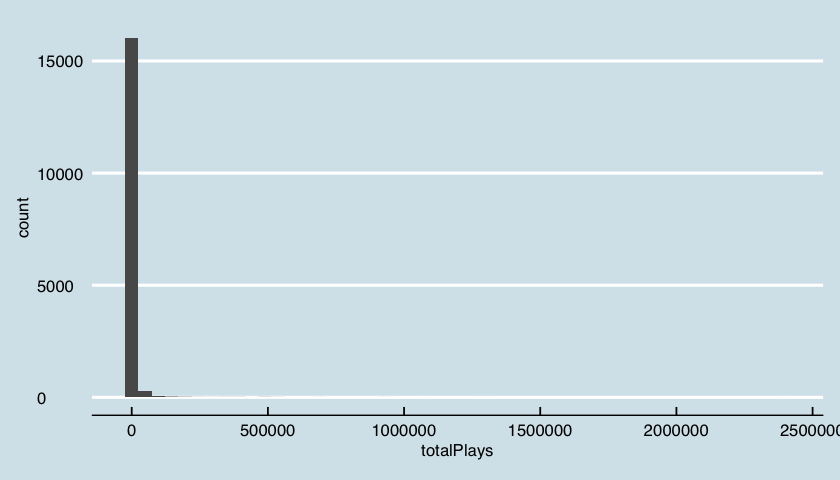

In [3]:
gg <- plays %>%
    group_by(artistID) %>%
    summarize(userCount=n(),
              totalPlays=sum(weight)) %>%
    inner_join(select(artists, artistID=id, name=name)) %>%
    arrange(desc(totalPlays))

head(gg)

ggplot(gg, aes(totalPlays)) +
geom_histogram(bins=50) +
theme_economist()


### Plot the distribution of unique users playing each artist

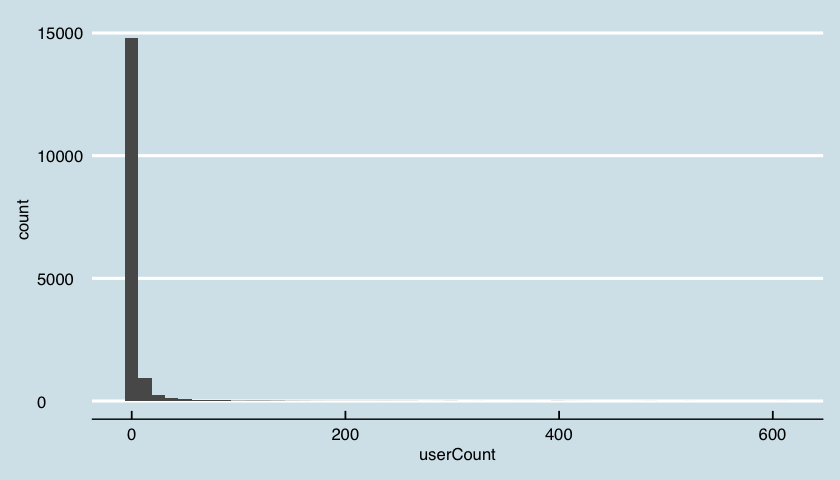

In [4]:
#gg <- plays %>%
#    group_by(artistID) %>%
#    summarize(userCount=n(),
#              totalPlays=sum(weight)) %>%
#    inner_join(select(artists, artistID=id, name=name))

ggplot(gg, aes(userCount)) +
geom_histogram(bins=50) +
theme_economist()

### Plot the distribution of play counts per user

Joining, by = "userID"


userID,totalPlaysPerUser,UniqueArtists
757,480039,50
1418,416349,50
1642,388251,50
1094,379125,50
514,329782,50
387,322661,50


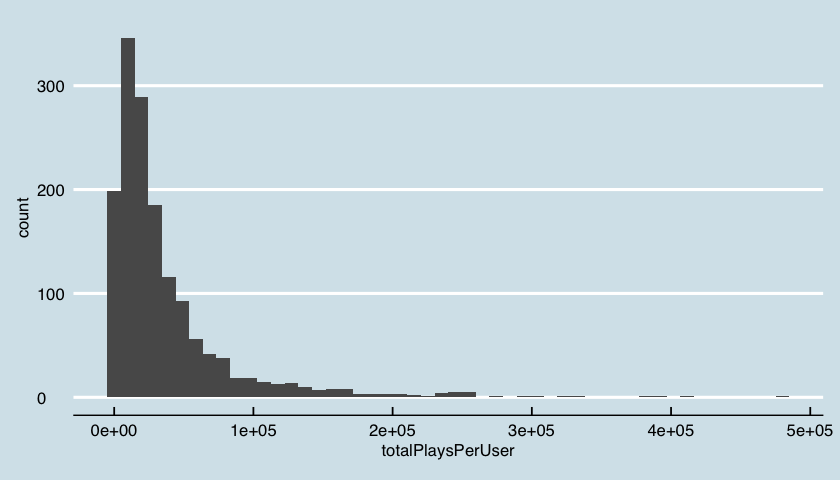

In [5]:
gg <- plays %>%
    group_by(userID) %>%
    summarize(totalPlaysPerUser=sum(weight),
              UniqueArtists=n()) %>%
    inner_join(select(artists, userID=id)) %>%
    arrange(desc(totalPlaysPerUser))
head(gg)


ggplot(gg, aes(totalPlaysPerUser)) +
geom_histogram(bins=50) +
theme_economist()


### Plot the distribution of unique artists per user

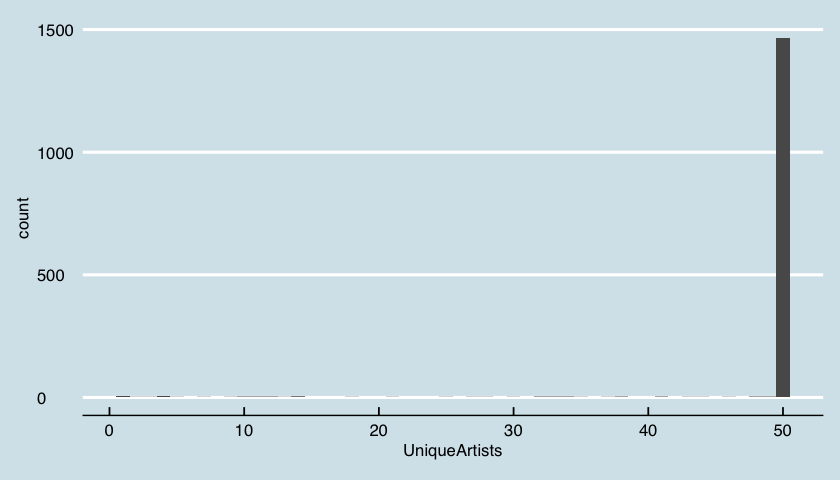

In [6]:
#gg <- plays %>%
#    group_by(userID) %>%
#    summarize(UniqueArtists=n())
#head(gg)

ggplot(gg, aes(UniqueArtists)) +
geom_histogram(bins=50) +
theme_economist()

### What is the mean artists-per-user? Users-per-artist? Plays per user/artist pair?

In [7]:
 plays %>%
    group_by(userID) %>%
    summarize(UniqueArtists=n()) %>%
    summarize(ArtistsPerUser= mean(UniqueArtists))

 plays %>%
    group_by(artistID) %>%
    summarize(UniqueUser=n()) %>%
    summarize(UserPerArtists = mean(UniqueUser))



ArtistsPerUser
49.0666


UserPerArtists
5.265086


### What are the 10 artists with the most plays?

In [8]:
head(
    plays %>%
    group_by(artistID) %>%
    summarize(totalPlays=sum(weight)) %>%
    inner_join(select(artists, artistID=id, name=name))%>%
    arrange(desc(totalPlays)),
    n=10)



Joining, by = "artistID"


artistID,totalPlays,name
289,2393140,Britney Spears
72,1301308,Depeche Mode
89,1291387,Lady Gaga
292,1058405,Christina Aguilera
498,963449,Paramore
67,921198,Madonna
288,905423,Rihanna
701,688529,Shakira
227,662116,The Beatles
300,532545,Katy Perry


### What are the 10 artists with the most unique playing users?

In [9]:
head(
    plays %>%
    group_by(artistID) %>%
    summarize(UniqueUser=n()) %>%
    inner_join(select(artists, artistID=id, name=name))%>%
    arrange(desc(UniqueUser)),
    n=10)


Joining, by = "artistID"


artistID,UniqueUser,name
89,611,Lady Gaga
289,522,Britney Spears
288,484,Rihanna
227,480,The Beatles
300,473,Katy Perry
67,429,Madonna
333,417,Avril Lavigne
292,407,Christina Aguilera
190,400,Muse
498,399,Paramore


## Part 2 - Association Rules

In [10]:
coplays <- plays %>%
    select(a1=artistID, userID) %>%
    inner_join(select(plays, a2=artistID, userID)) %>%
    filter(a1 != a2) %>%
    group_by(a1, a2) %>%
    summarize(count = n()) %>% 
    inner_join(select(artists, a1=id, name1=name)) %>%
    inner_join(select(artists, a2=id, name2=name)) %>%
    arrange(desc(count))

Joining, by = "userID"
Joining, by = "a1"
Joining, by = "a2"


### What pair of artists has been co-played the most often?



In [11]:
head(coplays,n=1)

a1,a2,count,name1,name2
89,289,436,Lady Gaga,Britney Spears


### How many users have listened to both Nickelback and Britney Spears?

In [12]:
filter(coplays, name1 == "Nickelback" & name2 == "Britney Spears")

a1,a2,count,name1,name2
966,289,46,Nickelback,Britney Spears


### Given that a user has listened to Nickelback, what is the probability that they have also listened to Britney Spears?

In [13]:
head(plays)
head(artists)

plays %>%
    group_by(artistID) %>%
    summarize(userCount=n()) %>%
    inner_join(select(artists, artistID=id, name=name)) %>%
    filter(name=="Nickelback")

userID,artistID,weight
2,51,13883
2,52,11690
2,53,11351
2,54,10300
2,55,8983
2,56,6152


id,name,url,pictureURL
1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717.jpg
4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835.png
5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013.jpg
6,Moonspell,http://www.last.fm/music/Moonspell,http://userserve-ak.last.fm/serve/252/2181591.jpg


Joining, by = "artistID"


artistID,userCount,name
966,112,Nickelback


So 112 listen to Nickelback and 46 of those 112 people listen to both Nickelback and Britney Spears. Thus, 46/112 ( or 41%), is the probability that someone listens to BS given they listen to Nickelback. 


### Given that a user has listened to Aretha Franklin, what 10 artists are they most likely to have listened to?

In [14]:
head(filter(coplays, name1 == "Aretha Franklin"),n=10)

a1,a2,count,name1,name2
575,67,10,Aretha Franklin,Madonna
575,227,9,Aretha Franklin,The Beatles
575,55,8,Aretha Franklin,Kylie Minogue
575,89,8,Aretha Franklin,Lady Gaga
575,288,8,Aretha Franklin,Rihanna
575,292,8,Aretha Franklin,Christina Aguilera
575,295,8,Aretha Franklin,Beyoncé
575,903,8,Aretha Franklin,Amy Winehouse
575,300,7,Aretha Franklin,Katy Perry
575,97,6,Aretha Franklin,Duffy


## Part 3 - Extending Association Rules

### What 10 artists have the highest lift with respect to Aretha Franklin?

In [15]:
# Calculate the number of users
plays %>% 
    group_by(userID) %>%
    summarize(UniqueArtists=n()) %>%
    summarize(NumOfUser= length(UniqueArtists))


plays %>% #P(X) = 22
    group_by(artistID) %>%
    summarize(UniqueUser=n()) %>%
    inner_join(select(artists, artistID=id, name=name))%>%
    filter(name=="Aretha Franklin")



NumOfUser
1892


Joining, by = "artistID"


artistID,UniqueUser,name
575,22,Aretha Franklin


In [20]:
playsWithUserCount <- plays %>%
                        group_by(artistID) %>%
                        summarize(userCount=n()) 

filter(coplays, name1 == "Aretha Franklin") %>%
    arrange(a2) %>% # Second Artist id 
    rename(artistID = a2) %>%# Rename for join call
    inner_join(playsWithUserCount) %>%
    rename(a2 = artistID) %>% # Rename back to orignal name
    mutate(lift = ((count)/(22*userCount))) %>% # calculate lift
    arrange(desc(lift),desc(count)) %>%
    head(n=11)



Joining, by = "artistID"


a1,a2,count,name1,name2,userCount,lift
575,564,2,Aretha Franklin,Mahalia Jackson,2,0.04545455
575,584,2,Aretha Franklin,The Isley Brothers,2,0.04545455
575,8807,2,Aretha Franklin,Brenda Lee,2,0.04545455
575,10133,2,Aretha Franklin,Diana Ross and The Supremes,2,0.04545455
575,10134,2,Aretha Franklin,Lou Rawls,2,0.04545455
575,550,1,Aretha Franklin,The Fleshtones,1,0.04545455
575,551,1,Aretha Franklin,The Satelliters,1,0.04545455
575,552,1,Aretha Franklin,The Barracudas,1,0.04545455
575,553,1,Aretha Franklin,The Staggers,1,0.04545455
575,555,1,Aretha Franklin,The Swingin' Neckbreakers,1,0.04545455


### What is the lift of Nickelback and Britney Spears?

In [17]:
filter(coplays, name1 == "Nickelback" & name2 == "Britney Spears")

plays %>% 
    group_by(artistID) %>%
    summarize(userCount=n()) %>%
    inner_join(select(artists, artistID=id, name=name)) %>%
    filter(name == "Nickelback" | name == "Britney Spears" ) 

(46)/(522*112)

a1,a2,count,name1,name2
966,289,46,Nickelback,Britney Spears


Joining, by = "artistID"


artistID,userCount,name
289,522,Britney Spears
966,112,Nickelback


[1] 0.000786809

### What is the lift of Britney Spears and Ozzy Osbourne?

In [18]:
filter(coplays, name1 == "Ozzy Osbourne" & name2 == "Britney Spears")

plays %>% 
    group_by(artistID) %>%
    summarize(userCount=n()) %>%
    inner_join(select(artists, artistID=id, name=name)) %>%
    filter(name == "Ozzy Osbourne" | name == "Britney Spears" ) 

(2)/(522*66)

a1,a2,count,name1,name2
724,289,2,Ozzy Osbourne,Britney Spears


Joining, by = "artistID"


artistID,userCount,name
289,522,Britney Spears
724,66,Ozzy Osbourne


[1] 5.805178e-05